# Quantium Virtual Internship Project - Retail Srategy and Analytics

## Task 1. Data preperation and customer analytics

In [72]:
# make all the necessery imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import re
import numpy as np
from scipy.stats import ttest_ind

%matplotlib inline

### Import datasets as pandas dataframes

In [73]:
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [74]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [75]:
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [76]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Examining and cleaning transaction data

In [77]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [78]:
# convert excel style date to date format
transaction_data['DATE'] = pd.TimedeltaIndex(transaction_data['DATE'], unit='d') + dt.datetime(1899, 12, 30)
transaction_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [79]:
# make sure that we are looking at chips only
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [80]:
# get a list of words used in the PROD_NAME column
common_words_lists_of_lists = [i.split() for i in list(transaction_data['PROD_NAME'])]
common_words = []
for sublist in common_words_lists_of_lists:
    for word in sublist:
        common_words.append(word)

In [81]:
common_words[:10]

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle']

In [82]:
# drop all words including digits or special characters
clean_common_words = [word for word in common_words if not re.search(r'[@_!#$%^&*()<>?/\|}{~:0-9]', word)]
clean_common_words[:10]

['Natural',
 'Chip',
 'Compny',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips']

In [83]:
# create a dictionary of word counts and sort it
word_counts = {}
for word in clean_common_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('Chips', 49770),
 ('Kettle', 41288),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('Vinegar', 12402),
 ('Chilli', 12389),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain', 6272),
 ('Waves', 6272),
 ('Lightly', 6248),
 ('Salted', 6248),
 ('Soy', 6121),
 ('Natural', 6050),
 ('Mild', 6048),
 ('Red', 5885),
 ('Rock', 5885),
 ('Deli', 5885),
 ('Thai'

In [84]:
# drop all Salsa products from the transactions
filtered_transaction_data = transaction_data[~transaction_data.PROD_NAME.str.contains("Salsa")]
filtered_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [85]:
# get summary statistics of the transaction data
filtered_transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [86]:
# investigate the transactions where 200 bags of chip were bought
filtered_transaction_data[filtered_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [87]:
# what other transactions does this customer have?
filtered_transaction_data[filtered_transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [88]:
# since this customer is not an ordinary retail customer, we will drop these records from the dataset
filtered_transaction_data = filtered_transaction_data[~(filtered_transaction_data['PROD_QTY'] == 200)]
filtered_transaction_data[filtered_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [89]:
# check the summary statistics of transaction data one more time
filtered_transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


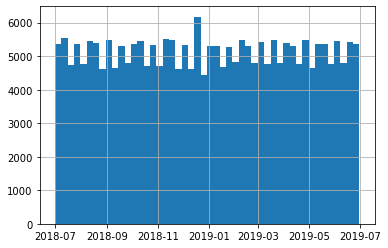

In [90]:
# plot transactions over time

filtered_transaction_data['DATE'].hist(bins=48)
plt.show()

There is an increase in the amount of sales directly before Christmas. No Christmas data is available, probably because the shops were closed on that day.

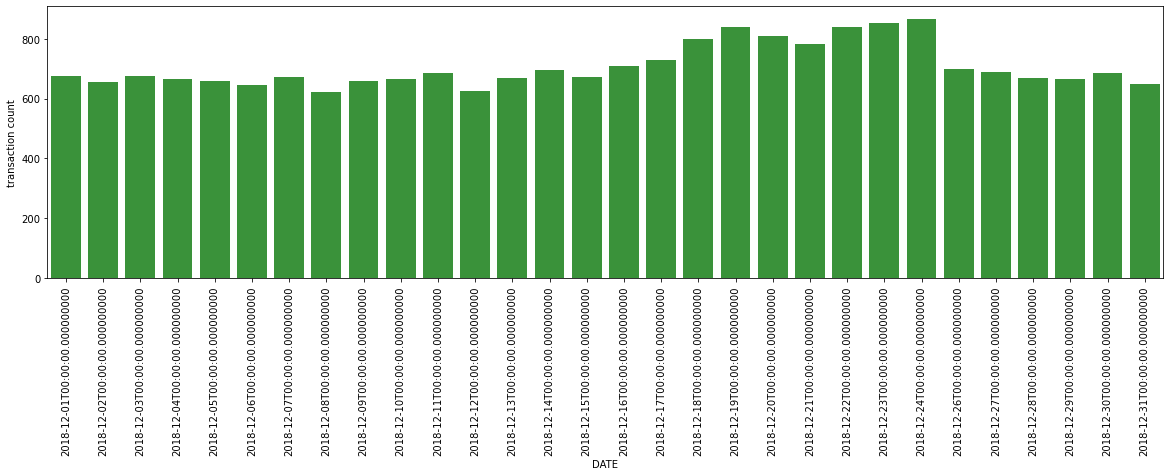

In [91]:
# zoom in December 2018 transactions

default_color = sb.color_palette()[2]
plt.figure(figsize = [20,5])

sb.countplot(x='DATE', data=filtered_transaction_data[
    (filtered_transaction_data['DATE'] <= '2018-12-31') & (filtered_transaction_data['DATE'] >= '2018-12-01')], 
             color=default_color)
plt.xticks(rotation=90)
plt.ylabel('transaction count')
plt.show()

In [92]:
# create a column with pack size

filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PROD_NAME'].str.extract(r'(\d+)')
filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PACK_SIZE'] + " g"
filtered_transaction_data['PACK_SIZE'].head()

0    175 g
1    175 g
2    170 g
3    175 g
4    150 g
Name: PACK_SIZE, dtype: object

In [93]:
# check if the pack sizes make sense

filtered_transaction_data['PACK_SIZE'].unique()

array(['175 g', '170 g', '150 g', '330 g', '210 g', '270 g', '220 g',
       '125 g', '110 g', '134 g', '380 g', '180 g', '165 g', '135 g',
       '250 g', '200 g', '160 g', '190 g', '90 g', '70 g'], dtype=object)

[Text(0, 0.5, 'number of transactions'), Text(0.5, 0, 'pack size')]

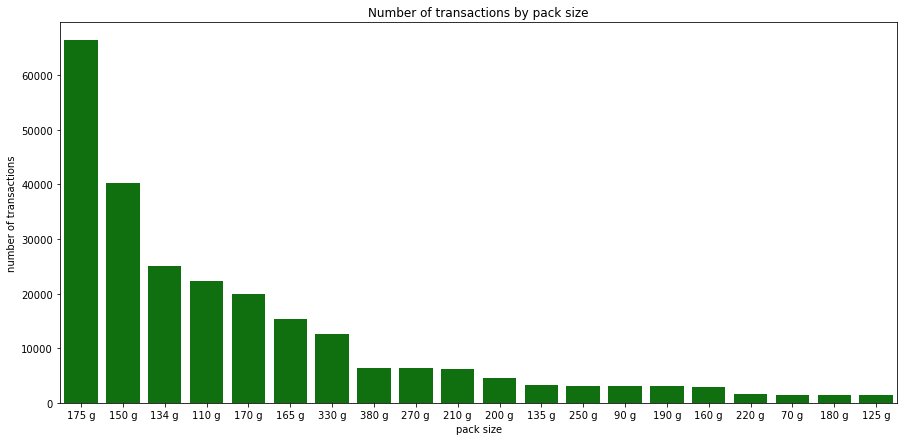

In [94]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Number of transactions by pack size')
sb.countplot(x = 'PACK_SIZE', data=filtered_transaction_data, ax=ax, order = filtered_transaction_data['PACK_SIZE'].value_counts().index,
            color='green')
ax.set(xlabel='pack size', ylabel='number of transactions')

In [95]:
# create a column with brand names

filtered_transaction_data['PACK_BRAND'] = filtered_transaction_data['PROD_NAME'].str.split().str.get(0)
filtered_transaction_data['PACK_BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [96]:
# RED and RRD are the same so let's rename RED to RRD

filtered_transaction_data['PACK_BRAND'] = filtered_transaction_data['PACK_BRAND'].str.replace('Red', 'RRD', regex = False)
filtered_transaction_data['PACK_BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'RRD', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'Sunbites'], dtype=object)

In [97]:
# Infzns and Infuzions are the same so let's rename Infzns to Infuzions

filtered_transaction_data['PACK_BRAND'] = filtered_transaction_data['PACK_BRAND'].str.replace('Infzns', 'Infuzions', regex = False)
filtered_transaction_data['PACK_BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Dorito', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'Sunbites'], dtype=object)

In [98]:
# Snbts and Sunbites are the same so let's rename Snbts to Sunbites

filtered_transaction_data['PACK_BRAND'] = filtered_transaction_data['PACK_BRAND'].str.replace('Snbts', 'Sunbites', regex = False)
filtered_transaction_data['PACK_BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Dorito', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths',
       'Sunbites'], dtype=object)

In [99]:
# Dorito and Doritos are the same so let's rename Dorito to Doritos

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "Dorito", "PACK_BRAND"] = "Doritos"
filtered_transaction_data["PACK_BRAND"].unique()


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Smith', 'GrnWves', 'Tyrrells',
       'Cobs', 'French', 'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'],
      dtype=object)

In [100]:
# Grain and GrnWves are actually called Grain Waves, so let's rename accordingly

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "Grain", "PACK_BRAND"] = "Grain Waves"
filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "GrnWves", "PACK_BRAND"] = "Grain Waves"
filtered_transaction_data["PACK_BRAND"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Smith', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'],
      dtype=object)

In [101]:
# Burger is actually called Burger Rings, so let's rename those as well

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "Burger", "PACK_BRAND"] = "Burger Rings"
filtered_transaction_data["PACK_BRAND"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger Rings', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Smith', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'],
      dtype=object)

In [102]:
# Natural and NCC are actually called Natural Chip Company, let's rename Natual to NCC

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "Natural", "PACK_BRAND"] = "NCC"
filtered_transaction_data["PACK_BRAND"].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger Rings', 'Cheezels', 'Infuzions',
       'RRD', 'Pringles', 'Smith', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Woolworths', 'Sunbites'], dtype=object)

In [103]:
# rename Smith to Smiths

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "Smith", "PACK_BRAND"] = "Smiths"
filtered_transaction_data["PACK_BRAND"].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger Rings', 'Cheezels', 'Infuzions',
       'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French', 'Tostitos',
       'Cheetos', 'Woolworths', 'Sunbites'], dtype=object)

In [104]:
# rename French to French Fries

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "French", "PACK_BRAND"] = "French Fries"
filtered_transaction_data["PACK_BRAND"].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger Rings', 'Cheezels', 'Infuzions',
       'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French Fries', 'Tostitos',
       'Cheetos', 'Woolworths', 'Sunbites'], dtype=object)

In [105]:
# rename WW to Woolworths

filtered_transaction_data.loc[filtered_transaction_data['PACK_BRAND'] == "WW", "PACK_BRAND"] = "Woolworths"
filtered_transaction_data["PACK_BRAND"].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger Rings', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French Fries',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [106]:
filtered_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175 g,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175 g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170 g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175 g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150 g,Kettle


In [107]:
# save clean transaction data

filtered_transaction_data.to_csv('QVI_transaction_data_clean.csv', index=False)

### Examining customer data

In [108]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [109]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [110]:
# check if lifestage values make sense
customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [111]:
# check if premium customer values make sense
customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Merging the dataframes

In [112]:
# merge the dataframes
all_data = filtered_transaction_data.merge(customer_data, on = 'LYLTY_CARD_NBR')
all_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175 g,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175 g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160 g,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175 g,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170 g,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [113]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  object        
 9   PACK_BRAND        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.5+ MB


In [114]:
filtered_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   PACK_SIZE       246740 non-null  object        
 9   PACK_BRAND      246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 30.7+ MB


Since all_data and filtered_transaction_data have the same number of rows, we can conclude that we have correctly joined the dataframes.
There are also no nulls, which means all our customers in the transaction data has been accounted for in the customer dataset.

### Saving the cleaned merged dataframe to a .csv file

In [115]:
all_data.to_csv('QVI_data.csv', index=False)

### Analysing customer segments

Metrics of interest:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is?
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [116]:
sales_by_segment = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg('sum').reset_index().sort_values(['TOT_SALES'], ascending=False)
sales_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


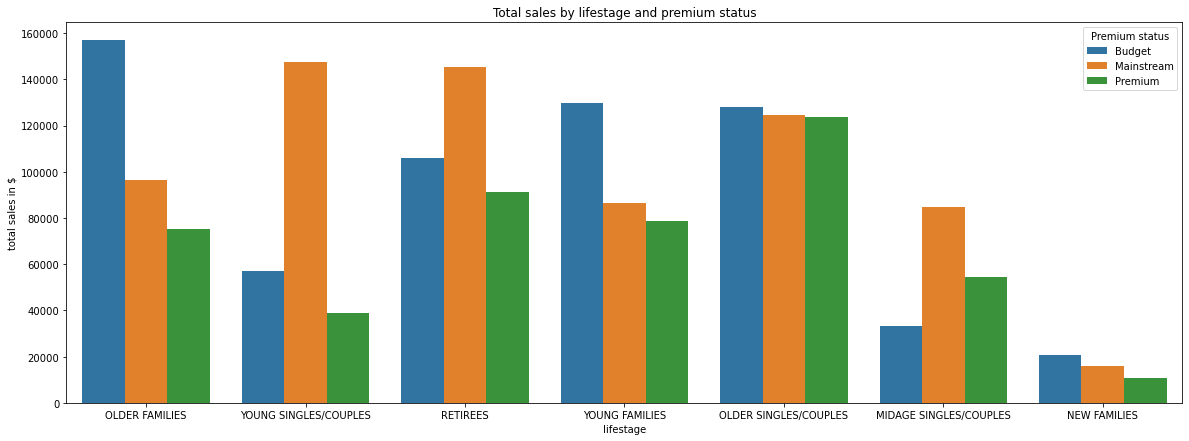

In [117]:
fig, ax = plt.subplots(figsize=(20, 7))
ax = sb.barplot(x='LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER',
               data = sales_by_segment)
ax.set(xlabel='lifestage', ylabel='total sales in $', title = 'Total sales by lifestage and premium status')
ax.legend(title = 'Premium status')

#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [118]:
transactions_by_segment = customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='COUNT').sort_values(['COUNT'], ascending=False)
transactions_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,COUNT
19,YOUNG SINGLES/COUPLES,Mainstream,8088
13,RETIREES,Mainstream,6479
10,OLDER SINGLES/COUPLES,Mainstream,4930
9,OLDER SINGLES/COUPLES,Budget,4929
11,OLDER SINGLES/COUPLES,Premium,4750
6,OLDER FAMILIES,Budget,4675
12,RETIREES,Budget,4454
15,YOUNG FAMILIES,Budget,4017
14,RETIREES,Premium,3872
18,YOUNG SINGLES/COUPLES,Budget,3779


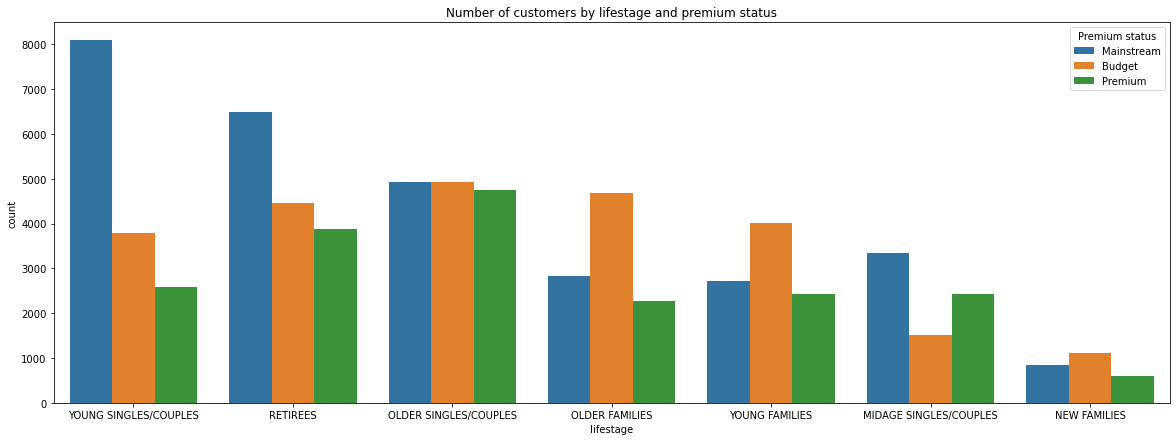

In [119]:
fig, ax = plt.subplots(figsize=(20, 7))
ax = sb.barplot(x='LIFESTAGE', y = 'COUNT', hue = 'PREMIUM_CUSTOMER',
               data = transactions_by_segment)
ax.set(xlabel='lifestage', ylabel='count', title = 'Number of customers by lifestage and premium status')
ax.legend(title = 'Premium status')

The top 2 customer segments are among the top 3 sales segments, so higher sales for those 2 customer segments are due to there being more customers who buy chips. 
Higher sales of Budget - Older families segment, on the other hand, is not due to there being more customers like those in general.

#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [120]:
avg_qty_by_segment = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].agg('mean').reset_index().sort_values(['PROD_QTY'], ascending=False)
avg_qty_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
6,OLDER FAMILIES,Budget,1.945384
16,YOUNG FAMILIES,Mainstream,1.941408
15,YOUNG FAMILIES,Budget,1.941226
17,YOUNG FAMILIES,Premium,1.938149
9,OLDER SINGLES/COUPLES,Budget,1.914920
11,OLDER SINGLES/COUPLES,Premium,1.913949
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
10,OLDER SINGLES/COUPLES,Mainstream,1.911201


Older families and young families buy more packs of chips in general.

#### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [121]:
# Create a column with price per unit
all_data['PRICE_PER_UNIT'] = all_data['TOT_SALES']/all_data['PROD_QTY']

In [122]:
avg_ppu_by_segment = all_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].agg('mean').reset_index().sort_values(['PRICE_PER_UNIT'], ascending=False)
avg_ppu_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
19,YOUNG SINGLES/COUPLES,Mainstream,4.065642
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
12,RETIREES,Budget,3.924404
14,RETIREES,Premium,3.920942
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
11,OLDER SINGLES/COUPLES,Premium,3.893182
9,OLDER SINGLES/COUPLES,Budget,3.882096
5,NEW FAMILIES,Premium,3.872110
13,RETIREES,Mainstream,3.844294


Mainstream midage and young singles and couples pay more per package.

#### T-test for average price per unit by LIFESTAGE and PREMIUM_CUSTOMER to assess statistical significance

In [123]:
# define group 1

group1 = all_data[(all_data['PREMIUM_CUSTOMER'] == 'Mainstream') &
                     ((all_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (all_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]
group1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
4692,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170 g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-03-23,3,3159,1757,36,Kettle Chilli 175g,2,10.8,175 g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4694,2019-05-10,3,3159,1758,81,Pringles Original Crisps 134g,2,7.4,134 g,Pringles,MIDAGE SINGLES/COUPLES,Mainstream,3.7
4695,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,170 g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2019-04-22,3,3294,2369,114,Kettle Sensations Siracha Lime 150g,2,9.2,150 g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,4.6


In [124]:
# define group 2

group2 = all_data[((all_data['PREMIUM_CUSTOMER'] == 'Budget') | (all_data['PREMIUM_CUSTOMER'] == 'Premium')) &
                     ((all_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (all_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]
group2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PACK_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175 g,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175 g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160 g,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175 g,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170 g,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [125]:
# perform the t test

ttest_ind(group1['PRICE_PER_UNIT'], group2['PRICE_PER_UNIT'])

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

The t-test results in a p-value of 2e^-309, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than
that of budget or premium, young and midage singles and couples.

#### Deep dive into Mainstream, young singles/couples, a segment that contributes significant amount in total sales.

In [126]:
# define the segments
target_segment = all_data[(all_data['PREMIUM_CUSTOMER'] == 'Mainstream') & (all_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
other_segment = all_data[(all_data['PREMIUM_CUSTOMER'] != 'Mainstream') & (all_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES')]

# total product quantity in each segment
target_quantity = sum(target_segment['PROD_QTY'])
other_quantity = sum(other_segment['PROD_QTY'])

# total quantity by brand in each segment
target_qty = target_segment.groupby(['PACK_BRAND'])['PROD_QTY'].agg('sum').reset_index().sort_values(['PROD_QTY'], ascending=False)
other_qty = other_segment.groupby(['PACK_BRAND'])['PROD_QTY'].agg('sum').reset_index().sort_values(['PROD_QTY'], ascending=False)

# calculate brand proportions by brand in each segment
target_qty['TARGET_BRAND_PROP'] = target_qty['PROD_QTY']/target_quantity
other_qty['OTHER_BRAND_PROP'] = other_qty['PROD_QTY']/other_quantity

# drop PROD_QTY column
target_qty.drop('PROD_QTY', axis=1, inplace=True)
other_qty.drop('PROD_QTY', axis=1, inplace=True)


# merge the target_qty with other_qty
all_qty = target_qty.merge(other_qty, on = 'PACK_BRAND')

#calculate brand affinity for each brand
all_qty['BRAND_AFFINITY'] = all_qty['TARGET_BRAND_PROP']/all_qty['OTHER_BRAND_PROP']


all_qty = all_qty.sort_values(['BRAND_AFFINITY'], ascending=False)

all_qty

,PACK_BRAND,TARGET_BRAND_PROP,OTHER_BRAND_PROP,BRAND_AFFINITY
11,Tyrrells,0.031553,0.025715,1.227025
6,Twisties,0.046184,0.037933,1.217506
1,Doritos,0.122761,0.101171,1.213397
0,Kettle,0.197985,0.166560,1.188667
7,Tostitos,0.045411,0.038350,1.184100
2,Pringles,0.119420,0.101110,1.181090
8,Cobs,0.044638,0.038449,1.160959
4,Infuzions,0.064679,0.057410,1.126622
5,Thins,0.060373,0.057159,1.056217
10,Grain Waves,0.032712,0.031069,1.052895


We can see that :

- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.
- Mainstreamyoungsingles/couplesare56%lesslikelytopurchaseBurgerRingscomparedtotherest of the population